# Predicción de valor de vivienda

## Análisis inicial de la base de datos

In [264]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import random

Mas adelante importaremos otras librerías,conforme las vayamos necesitando

### Abrir bases de datos
Disponemos de 3 bases de datos diferentes: train.csv, test.csv, data_description.txt
#### data_description.txt
Crearemos un  dict a partir del txt, entonces para la descripcion de cada parámetro lo tendremos fácil. Lo abriremos como se muestra e iteraremos por todas sus filas.

In [265]:
b={}

with open('data_description.txt','r') as f:
    for line in f:
        if not line.startswith(tuple(list(string.ascii_uppercase))):
            pass
        else:
            (key, value) = line.split(sep=':')
            value=value.strip()
            b[key]=value
    
#print(b)    


In [266]:
b['SaleType']

'Type of sale'

#### train.csv
La abriremos colocando la columna Id como índice, y la exploraremosun poco

In [267]:
df = pd.read_csv('train.csv',index_col='Id')

In [268]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Con .info() podremos ver las columnas en las que faltan valores, y el tipo de datos que tenemos.

In [269]:
#df.info()

Ahora comprobaremos que porcentaje de datos de cada columna son nulos(NaN). Para ello, aplicamos la ecuación que se ve a continuación. También desplegaremos todas las filas para que se vean (pd.options.display.min_rows).

In [270]:
pd.options.display.min_rows = 80
100 * (df.isnull().sum().sort_values(ascending=False) / len(df))

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
Fireplaces       0.000000
Functional       0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
BedroomAbvGr     0.000000
HalfBath         0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
TotRmsAbvGrd     0.000000
GarageCars       0.000000
                  ...    
HouseStyle       0.000000
BldgType         0.000000
Condition2       0.000000
Condition1       0.000000
LandSlope        0.000000
2ndFlrSF         0.000000
LotConfig        0.000000
Utilities   

Las categorías que tiene un alto porcentaje de valores nulos las vamos a eliminar, ya que sería muy inpreciso tratar de rellenarlas con otros valores. Algo que si haremos con otras categorías.

In [271]:
df = df.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

Con .describe() nos hacemos una idea de los valores con los que debemos estar  tratando

In [272]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Una vez identificada la columna resultado (es decir, el resultado de nuestro modelo debe ser muy parecido a dicha columna).
 Veremos la correlación con el resto de categorías. Comprobamos que tiene una gran correlación con OverallQual, lo cual tiene mucho sentido. Esto lo ordenamos de mayor a menor correlación(.sort_values()).

In [273]:
df.corr()['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

##### Haremos un plot para ver los valores en los que nos movemos.
EL resultado de nuestro modelo aplicado a los datos de test.csv debería ser muy parecido.

/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

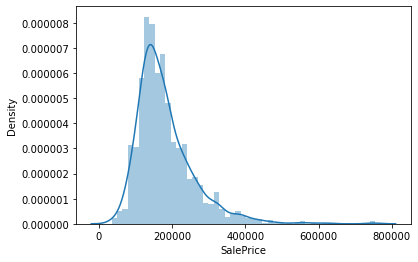

In [274]:
sns.distplot(df['SalePrice'])

##### Hemos observado que la categoría LotFrontage tiene un 17% de valores nulos
Con respecto a esto podemos quitar la columna entera, o rellenar con valores. Estos valores los pueden ser cualquiera, pero lo lógico es que sean acorde a algo que tenga relación. Por lo tanto, veremos la correlación que tiene esta categoría con las demás.

In [275]:
b['LotFrontage']

'Linear feet of street connected to property'

In [276]:
df.corr()['LotFrontage'].sort_values(ascending=False)

LotFrontage      1.000000
1stFlrSF         0.457181
LotArea          0.426095
GrLivArea        0.402797
TotalBsmtSF      0.392075
TotRmsAbvGrd     0.352096
SalePrice        0.351799
GarageArea       0.344997
GarageCars       0.285691
Fireplaces       0.266639
BedroomAbvGr     0.263170
OverallQual      0.251646
BsmtFinSF1       0.233633
PoolArea         0.206167
FullBath         0.198769
MasVnrArea       0.193458
OpenPorchSF      0.151972
BsmtUnfSF        0.132644
YearBuilt        0.123349
BsmtFullBath     0.100949
YearRemodAdd     0.088866
WoodDeckSF       0.088521
2ndFlrSF         0.080177
GarageYrBlt      0.070250
3SsnPorch        0.070029
HalfBath         0.053532
BsmtFinSF2       0.049900
ScreenPorch      0.041383
LowQualFinSF     0.038469
MoSold           0.011200
EnclosedPorch    0.010700
YrSold           0.007450
MiscVal          0.003368
KitchenAbvGr    -0.006069
BsmtHalfBath    -0.007234
OverallCond     -0.059213
MSSubClass      -0.386347
Name: LotFrontage, dtype: float64

Observamos que tiene una gran correlación con 1stFlrSF, y por lo tanto será lo que utilicemos para rellenar los huecos. Sin embargo, no podemos poner el valor directamente por lo que hay que pensar un poco más como hacerlo.

La idea será agrupar toda la df acorde a 1stFlrSF, y entonces sacar el valor medio de cada una de las categorías de acuerdo a cada valor de 1stFlrSF. Entonces nos centraremos en la categoría LotFrontage. De esta manera cuando haya un valor NaN en la columna LotFrontage, el código lo sustituirá por el valor medio que ha obtenido de otros datos de LotFrontage que tienen el mismo valor para 1stFlrSF.

Es decir, Si tengo 5 valores de LotFrontage que comparten un mismo valor de 1stFlrSF, mi código va a obtener el valor medio de esos 5 y será x. Por lo tanto, si más adelante el código encuentra un valor NaN en la columna de LotFrontage, MIRARÁ el valor que tiene en  1stFlrSF y si coincide con el valor de los otros 5, entonces donde había un NaN colocará un x

In [277]:
#b['1stFlrSF']

In [278]:
df[['LotFrontage','1stFlrSF']].head()

,LotFrontage,1stFlrSF
Id,,
1,65.0,856
2,80.0,1262
3,68.0,920
4,60.0,961
5,84.0,1145


In [279]:
firstFlorSF_mean = df.groupby('1stFlrSF').mean()

In [280]:
firstFlorSF_mean=firstFlorSF_mean.fillna(method='ffill')['LotFrontage']

In [281]:
def fillFun(y,y_2):
    if np.isnan(y_2):
        return firstFlorSF_mean[y]
    else:
        return y_2

In [282]:
df['LotFrontage'] = df.apply(
    lambda x: fillFun(x['1stFlrSF'],x['LotFrontage']),axis=1)

In [283]:
df.isnull().sum()['LotFrontage']

0

Hemos comprobado que ya no tenemos valores nulos en esta columna

## test.csv 
Haremos lo mismo que con train.csv 



In [284]:
df_test = pd.read_csv('test.csv',index_col='Id')

In [285]:
pd.options.display.min_rows = 80
100 * (df_test.isnull().sum().sort_values(ascending=False) / len(df_test))

PoolQC           99.794380
MiscFeature      96.504455
Alley            92.666210
Fence            80.123372
FireplaceQu      50.034270
LotFrontage      15.558602
GarageYrBlt       5.346127
GarageFinish      5.346127
GarageQual        5.346127
GarageCond        5.346127
GarageType        5.209047
BsmtCond          3.084304
BsmtExposure      3.015764
BsmtQual          3.015764
BsmtFinType2      2.878684
BsmtFinType1      2.878684
MasVnrType        1.096642
MasVnrArea        1.028101
MSZoning          0.274160
Functional        0.137080
BsmtHalfBath      0.137080
BsmtFullBath      0.137080
Utilities         0.137080
KitchenQual       0.068540
SaleType          0.068540
BsmtFinSF1        0.068540
GarageCars        0.068540
BsmtUnfSF         0.068540
TotalBsmtSF       0.068540
Exterior2nd       0.068540
                   ...    
HeatingQC         0.000000
FullBath          0.000000
OverallCond       0.000000
LotArea           0.000000
Street            0.000000
LotShape          0.000000
L

In [286]:
df_test = df_test.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'], axis=1)

In [287]:
df_test_firstFlorSF_mean = df_test.groupby('1stFlrSF').mean()
df_test_firstFlorSF_mean=df_test_firstFlorSF_mean.fillna(method='ffill')['LotFrontage']

In [288]:
def fillFun_2(y,y_2):
    if np.isnan(y_2):
        return df_test_firstFlorSF_mean[y]
    else:
        return y_2

In [289]:
df_test['LotFrontage'] = df_test.apply(
    lambda x: fillFun_2(x['1stFlrSF'],x['LotFrontage']),axis=1)

In [290]:
df_test.isnull().sum()['LotFrontage']

0

### Analisis de las demás categorías

##### GarageYrBlt
realizaremos los mismo pasos que para LotFrontage

In [291]:
b['GarageYrBlt']

'Year garage was built'

In [292]:
df['GarageYrBlt'].dtype

dtype('float64')

In [293]:
df.corr()['GarageYrBlt'].sort_values(ascending=False)

GarageYrBlt      1.000000
YearBuilt        0.825667
YearRemodAdd     0.642277
GarageCars       0.588920
GarageArea       0.564567
OverallQual      0.547766
SalePrice        0.486362
FullBath         0.484557
TotalBsmtSF      0.322445
MasVnrArea       0.252691
1stFlrSF         0.233449
GrLivArea        0.231197
OpenPorchSF      0.228425
WoodDeckSF       0.224577
HalfBath         0.196785
BsmtUnfSF        0.190708
BsmtFinSF1       0.153484
TotRmsAbvGrd     0.148112
BsmtFullBath     0.124553
MSSubClass       0.085072
2ndFlrSF         0.070832
LotFrontage      0.055026
Fireplaces       0.046822
3SsnPorch        0.023544
MoSold           0.005337
YrSold          -0.001014
PoolArea        -0.014501
LotArea         -0.024947
MiscVal         -0.032417
LowQualFinSF    -0.036363
BedroomAbvGr    -0.064518
ScreenPorch     -0.075418
BsmtHalfBath    -0.077464
BsmtFinSF2      -0.088011
KitchenAbvGr    -0.124411
EnclosedPorch   -0.297003
OverallCond     -0.324297
Name: GarageYrBlt, dtype: float64

Tiene una gran correlación con YearBuilt, algo que es lógico, y será lo que usaremos para rellenar los NaN. En este caso, los valores tiene una correlación de casi el 90% con YearBuilt, y el total de valores nulos es del 5%. Debido a esto haremos un código que cuando encuentre un valor NaN lo sustituya por el valor correspondiente en YearBuilt. 
Si hubiese que mejorar el modelo podemos mejorar este punto

In [294]:
df.isnull().sum()['YearBuilt']

0

In [295]:
df[['YearBuilt','GarageYrBlt']].head()

,YearBuilt,GarageYrBlt
Id,,
1,2003,2003.0
2,1976,1976.0
3,2001,2001.0
4,1915,1998.0
5,2000,2000.0


In [296]:
def fill_GarageYrBlt(y):
    if np.isnan(y['GarageYrBlt']):
        return y['YearBuilt']
    else:
        return y['GarageYrBlt']

In [297]:
df['GarageYrBlt']=df.apply(
    lambda x: fill_GarageYrBlt(x),axis=1)

In [298]:
df.isnull().sum()['GarageYrBlt']

0

In [299]:
df[['YearBuilt','GarageYrBlt']].head()

,YearBuilt,GarageYrBlt
Id,,
1,2003,2003.0
2,1976,1976.0
3,2001,2001.0
4,1915,1998.0
5,2000,2000.0


Hacemos lo mismo para test.csv

In [300]:
df_test['GarageYrBlt']=df_test.apply(
    lambda x: fill_GarageYrBlt(x),axis=1)

##### GarageQual

Esta es una variable categórica y por lo tanto no podemos asimilarla a otra categoría. Sin embargo, podemos ver el porcentaje de aparición de cada uno de los posibles valores y rellenar los valores no nulos de tal manera que se mantenga dicho porcentaje.

Primero veremos que valores únicos hay, cual es su porcentaje. Hayque destacar que al calcular los porcentajes no estamos contando con los valores NaN, por lo que la suma de dichos porcentajes sera 100% - NaN%



In [301]:
df['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', nan, 'Ex', 'Po'], dtype=object)

In [302]:
df['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: GarageQual, dtype: int64

Obtenemos dichos porcentajes.

In [303]:
100*(df['GarageQual'].value_counts()/len(df['GarageQual']))

TA    89.794521
Fa     3.287671
Gd     0.958904
Ex     0.205479
Po     0.205479
Name: GarageQual, dtype: float64

Esta código iterará a través de la columna GarageQual y cuando encuentre un valor NaN, lo sustituirá por 'TA','Fa','Gd' de acuerdo a una probabilidad p=[.9,.06,.04], que debe parecerse mucho a la probabilidad que hemos obtenido antes

In [304]:
def filling_nan(y):
    if pd.isnull(y['GarageQual']):
        return np.random.choice(a=['TA','Fa','Gd'],p=[.9,.06,.04])
    else:
        return y['GarageQual']
    
    
    
df['GarageQual']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['GarageQual']=df_test.apply(
    lambda x: filling_nan(x),axis=1) 

 ### Seguimos con las otras categorias
 #GarageFinish      5.346127
 #GarageCond        5.346127
 #GarageType        5.209047
 #BsmtCond          3.084304
 BsmtQual          3.015764
 BsmtExposure      3.015764
 BsmtFinType1      2.878684
 BsmtFinType2      2.878684
 MasVnrType        1.096642
 MasVnrArea        1.028101

##### GarageFinish
Haremos lo mismo que con GarageQual

In [305]:
b['GarageFinish']

'Interior finish of the garage'

In [306]:
df['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [307]:
df['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [308]:
100*(df['GarageFinish'].value_counts()/len(df['GarageFinish']))

Unf    41.438356
RFn    28.904110
Fin    24.109589
Name: GarageFinish, dtype: float64

In [309]:
def filling_nan(y):
    if pd.isnull(y['GarageFinish']):
        return np.random.choice(a=['Unf','RFn','Fin'],p=[.4,.32,.28])
    else:
        return y['GarageFinish']

In [310]:
df['GarageFinish']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['GarageFinish']=df_test.apply(
    lambda x: filling_nan(x),axis=1)

#### Comprobamos que hemos rellando los huecos acorde a los porcentajes que hemos aplicado

In [311]:
100*(df['GarageFinish'].value_counts()/len(df['GarageFinish']))

Unf    44.041096
RFn    30.205479
Fin    25.753425
Name: GarageFinish, dtype: float64

In [312]:
df['GarageFinish'].value_counts()

Unf    643
RFn    441
Fin    376
Name: GarageFinish, dtype: int64

##### 'GarageCond'

In [313]:
b['GarageCond']

'Garage condition'

In [314]:
df['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [315]:
df['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [316]:
def filling_nan(y):
    if pd.isnull(y['GarageCond']):
        return np.random.choice(a=['TA','Fa','Gd'],p=[.9,.07,.03])
    else:
        return y['GarageCond']

In [317]:
df['GarageCond']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['GarageCond']=df_test.apply(
    lambda x: filling_nan(x),axis=1)

##### GarageType

In [318]:
df['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [319]:
100*(df['GarageType'].value_counts()/len(df['GarageType']))

Attchd     59.589041
Detchd     26.506849
BuiltIn     6.027397
Basment     1.301370
CarPort     0.616438
2Types      0.410959
Name: GarageType, dtype: float64

In [320]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [321]:
def filling_nan(y):
    if pd.isnull(y['GarageType']):
        return np.random.choice(a=['Attchd','Detchd','BuiltIn'],p=[.65,.25,.1])
    else:
        return y['GarageType']
    
    
    
df['GarageType']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['GarageType']=df_test.apply(
    lambda x: filling_nan(x),axis=1)    

##### BsmtCond

In [322]:
df['BsmtCond'].unique()

array(['TA', 'Gd', nan, 'Fa', 'Po'], dtype=object)

In [323]:
df['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [324]:
def filling_nan(y):
    if pd.isnull(y['BsmtCond']):
        return np.random.choice(a=['TA','Gd','Fa'],p=[.9,.05,.05])
    else:
        return y['BsmtCond']
    
    
    
df['BsmtCond']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['BsmtCond']=df_test.apply(
    lambda x: filling_nan(x),axis=1) 

##### BsmtQual

In [325]:
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [326]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [327]:
100*(df['BsmtQual'].value_counts()/len(df['BsmtQual']))

TA    44.452055
Gd    42.328767
Ex     8.287671
Fa     2.397260
Name: BsmtQual, dtype: float64

In [328]:
def filling_nan(y):
    if pd.isnull(y['BsmtQual']):
        return np.random.choice(a=['TA','Gd','Ex'],p=[.50,.42,.08])
    else:
        return y['BsmtQual']
    
    
    
df['BsmtQual']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['BsmtQual']=df_test.apply(
    lambda x: filling_nan(x),axis=1) 

##### BsmtExposure

In [329]:
b['BsmtExposure']

'Refers to walkout or garden level walls'

In [330]:
df['BsmtExposure'].unique()

array(['No', 'Gd', 'Mn', 'Av', nan], dtype=object)

In [331]:
df['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [332]:
100*(df['BsmtExposure'].value_counts()/len(df['BsmtExposure']))

No    65.273973
Av    15.136986
Gd     9.178082
Mn     7.808219
Name: BsmtExposure, dtype: float64

In [333]:
def filling_nan(y):
    if pd.isnull(y['BsmtExposure']):
        return np.random.choice(a=['No','Av','Gd','Mn'],p=[.67,.18,.09,.06])
    else:
        return y['BsmtExposure']
    
    
    
df['BsmtExposure']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['BsmtExposure']=df_test.apply(
    lambda x: filling_nan(x),axis=1) 

##### BsmtFinType1 and BsmtFinType2

In [334]:
b['BsmtFinType1']

'Rating of basement finished area'

In [335]:
b['BsmtFinType2']

'Rating of basement finished area (if multiple types)'

In [336]:
df['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', nan, 'LwQ'], dtype=object)

In [337]:
df['BsmtFinType2'].unique()

array(['Unf', 'BLQ', nan, 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [338]:
df['BsmtFinType1'].value_counts()

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [339]:
df['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [340]:
100*(df['BsmtFinType1'].value_counts()/len(df['BsmtFinType1']))


Unf    29.452055
GLQ    28.630137
ALQ    15.068493
BLQ    10.136986
Rec     9.109589
LwQ     5.068493
Name: BsmtFinType1, dtype: float64

In [341]:
100*(df['BsmtFinType2'].value_counts()/len(df['BsmtFinType2']))

Unf    86.027397
Rec     3.698630
LwQ     3.150685
BLQ     2.260274
ALQ     1.301370
GLQ     0.958904
Name: BsmtFinType2, dtype: float64

In [342]:
### BsmtFinType1

def filling_nan(y):
    if pd.isnull(y['BsmtFinType1']):
        return np.random.choice(
            a=['Unf','GLQ','ALQ','BLQ','Rec','LwQ'],p=[.30,.30,.15,.12,.08,.05])
    else:
        return y['BsmtFinType1']
    
    
    
df['BsmtFinType1']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['BsmtFinType1']=df_test.apply(
    lambda x: filling_nan(x),axis=1) 

#### BsmtFinType2

def filling_nan(y):
    if pd.isnull(y['BsmtFinType2']):
        return np.random.choice(
            a=['Unf','Rec','LwQ','BLQ','ALQ','GLQ'],p=[.86,.04,.030,.03,.02,.02])
    else:
        return y['BsmtFinType2']
    
    
    
df['BsmtFinType2']=df.apply(
    lambda x: filling_nan(x),axis=1)
df_test['BsmtFinType2']=df_test.apply(
    lambda x: filling_nan(x),axis=1) 

##### Nos quedan algunas categorias con valores NaN, pero son ya del 0.5% como mucho, por lo que vamos a probar a quitar esas filas a ver si no influye demasiado en el código.

In [343]:
df.isnull().sum().sort_values(ascending=False) / len(df)

MasVnrType       0.005479
MasVnrArea       0.005479
Electrical       0.000685
BedroomAbvGr     0.000000
Fireplaces       0.000000
Functional       0.000000
TotRmsAbvGrd     0.000000
KitchenQual      0.000000
KitchenAbvGr     0.000000
HalfBath         0.000000
CentralAir       0.000000
FullBath         0.000000
BsmtHalfBath     0.000000
BsmtFullBath     0.000000
GrLivArea        0.000000
LowQualFinSF     0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
GarageType       0.000000
MSSubClass       0.000000
GarageFinish     0.000000
GarageCars       0.000000
SaleCondition    0.000000
SaleType         0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
PoolArea         0.000000
ScreenPorch      0.000000
3SsnPorch        0.000000
                   ...   
Condition2       0.000000
Condition1       0.000000
Neighborhood     0.000000
LandSlope        0.000000
LotConfig        0.000000
Utilities        0.000000
LandContour      0.000000
LotShape    

In [344]:
df_test.isnull().sum().sort_values(ascending=False) / len(df_test) 

MasVnrType       0.010966
MasVnrArea       0.010281
MSZoning         0.002742
Functional       0.001371
BsmtFullBath     0.001371
BsmtHalfBath     0.001371
Utilities        0.001371
Exterior2nd      0.000685
KitchenQual      0.000685
GarageCars       0.000685
GarageArea       0.000685
Exterior1st      0.000685
BsmtFinSF2       0.000685
BsmtUnfSF        0.000685
TotalBsmtSF      0.000685
SaleType         0.000685
BsmtFinSF1       0.000685
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
GrLivArea        0.000000
Fireplaces       0.000000
MSSubClass       0.000000
2ndFlrSF         0.000000
EnclosedPorch    0.000000
YrSold           0.000000
MoSold           0.000000
MiscVal          0.000000
                   ...   
OverallCond      0.000000
LotFrontage      0.000000
LotArea          0.000000
Street           0.000000
LotShape         0.000000
LandContour      0.000000
LotConfig        0.000000
LandSlope   

In [345]:
df.shape

(1460, 75)

In [346]:
df_test.shape

(1459, 74)

Usaremos .dropna() para eliminar las filas en las que haya NaN

In [347]:
df = df.dropna(axis=0)
#df_test = df_test.dropna(axis=0)

In [348]:
df.shape

(1451, 75)

In [349]:
df_test.shape

(1459, 74)

### Ahora no tenemos falta de datos. lo siguiente será transformar las columnas 'object' en 'int64' o 'float', para que nuestro modelo pueda operar

In [350]:
df.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [351]:
df_test.select_dtypes(['object']).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

Ahora veremos los valores para cada una de las categorías, de la misma manera que hemos hecho en el apartado anterior

In [352]:
for column in df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']]:
                 
                 
                 print("\n" + column)
                 print(df[column].value_counts())



MSZoning
RL         1145
RM          218
FV           62
RH           16
C (all)      10
Name: MSZoning, dtype: int64

Street
Pave    1445
Grvl       6
Name: Street, dtype: int64

LotShape
Reg    918
IR1    482
IR2     41
IR3     10
Name: LotShape, dtype: int64

LandContour
Lvl    1302
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

Utilities
AllPub    1450
NoSeWa       1
Name: Utilities, dtype: int64

LotConfig
Inside     1045
Corner      262
CulDSac      93
FR2          47
FR3           4
Name: LotConfig, dtype: int64

LandSlope
Gtl    1373
Mod      65
Sev      13
Name: LandSlope, dtype: int64

Neighborhood
NAmes      225
CollgCr    149
OldTown    113
Edwards    100
Somerst     83
Gilbert     78
NridgHt     76
Sawyer      74
NWAmes      73
SawyerW     58
BrkSide     58
Crawfor     50
Mitchel     49
NoRidge     41
IDOTRR      37
Timber      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
B

In [353]:
for column in df_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']]:
                 
                 
                 print("\n" + column)
                 print(df_test[column].value_counts())



MSZoning
RL         1114
RM          242
FV           74
C (all)      15
RH           10
Name: MSZoning, dtype: int64

Street
Pave    1453
Grvl       6
Name: Street, dtype: int64

LotShape
Reg    934
IR1    484
IR2     35
IR3      6
Name: LotShape, dtype: int64

LandContour
Lvl    1311
HLS      70
Bnk      54
Low      24
Name: LandContour, dtype: int64

Utilities
AllPub    1457
Name: Utilities, dtype: int64

LotConfig
Inside     1081
Corner      248
CulDSac      82
FR2          38
FR3          10
Name: LotConfig, dtype: int64

LandSlope
Gtl    1396
Mod      60
Sev       3
Name: LandSlope, dtype: int64

Neighborhood
NAmes      218
OldTown    126
CollgCr    117
Somerst     96
Edwards     94
NridgHt     89
Gilbert     86
Sawyer      77
SawyerW     66
Mitchel     65
NWAmes      58
IDOTRR      56
Crawfor     52
BrkSide     50
Timber      34
NoRidge     30
StoneBr     26
SWISU       23
MeadowV     20
ClearCr     16
BrDale      14
NPkVill     14
Veenker     13
Blmngtn     11
Blueste      8
N

#### Get_dummies()
En este paso transformaremos las categorías que no tiene valores numéricos en categorías que si los tengan. Esto lo hace get_dummies() de tal manera que se crea una columan nueva por cada valor y coloca un 1 si lo cumple y un 0 si no.

In [354]:
dummies = pd.get_dummies(df[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']], drop_first=True)

#We can drop and concat in the same line

df = pd.concat([df.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], axis=1), dummies], axis=1)

#### df_test

dummies = pd.get_dummies(df_test[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition']], drop_first=True)

#We can drop and concat in the same line

df_test = pd.concat([df_test.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'], axis=1), dummies], axis=1)


COn df_testno hacemos .dropna() porque así tendremos todas las filas, por lo que los valores NaN los rellanaremos con 0

In [355]:
df_test = df_test.fillna(0)

### Modelo 

Importamos las nuevas librerias

In [356]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

##### Para hacer el modelo solo trabajaremos con train.csv, que es donde tenemos la columna SalePrice

Separaremos la base de datos en X e y, dejando como resultado y

In [357]:
X=df.drop('SalePrice', axis=1).values

y=df['SalePrice'].values


Seguidamente con train_test_split() separaremos en un nuevo bloque de train y otro de test (dentro de train.csv). Dejaremos un 33% para el test

In [358]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=101)

In [359]:
X_train.shape

(972, 232)

In [360]:
X_test.shape

(479, 232)

##### Escalaremos los datos con MinMaxScaler

In [361]:
scaler = MinMaxScaler()

In [362]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Creamos un modelo basado en rectified linear unit (ReLU)

In [363]:
model = Sequential()

model.add(Dense(232, activation='relu'))
model.add(Dense(116, activation='relu'))
model.add(Dense(58, activation='relu'))
model.add(Dense(29, activation='relu'))

model.add(Dense(1))
## Usaremos el optimizador adam ya que funciona muy bien
## Como se trata de una regresion linear y no una clasificación usaremos el mse
## mse (mean square error)

model.compile(optimizer='adam', loss='mse')

##### Ajustamos el  modelo con .fit() utilizando los datos destiando al train. Aunque para validar utilizaremos los datos destinado al test.
Esto no implica que el modelo pueda ver los datos del test, por lo tanto nos da una buena aproximación acerca del error sin hacernos trampa a nosotros mismo.

In [364]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test, y_test),
         batch_size=20, epochs=80)

Epoch 1/80
49/49 [==============================] - 1s 6ms/step - loss: 37897076736.0000 - val_loss: 40478437376.0000
Epoch 2/80
49/49 [==============================] - 0s 4ms/step - loss: 33675204608.0000 - val_loss: 26056916992.0000
Epoch 3/80
49/49 [==============================] - 0s 4ms/step - loss: 9769295872.0000 - val_loss: 5667110400.0000
Epoch 4/80
49/49 [==============================] - 0s 4ms/step - loss: 4339397632.0000 - val_loss: 4796893184.0000
Epoch 5/80
49/49 [==============================] - 0s 4ms/step - loss: 3593816576.0000 - val_loss: 4156019712.0000
Epoch 6/80
49/49 [==============================] - 0s 4ms/step - loss: 3020137728.0000 - val_loss: 3655805952.0000
Epoch 7/80
49/49 [==============================] - 0s 4ms/step - loss: 2614860800.0000 - val_loss: 3309842688.0000
Epoch 8/80
49/49 [==============================] - 0s 4ms/step - loss: 2271223552.0000 - val_loss: 2965961216.0000
Epoch 9/80
49/49 [==============================] - 0s 4ms/step - lo

49/49 [==============================] - 0s 4ms/step - loss: 449196288.0000 - val_loss: 1362475392.0000
Epoch 72/80
49/49 [==============================] - 0s 4ms/step - loss: 461761024.0000 - val_loss: 1366951680.0000
Epoch 73/80
49/49 [==============================] - 0s 4ms/step - loss: 441463584.0000 - val_loss: 1374465920.0000
Epoch 74/80
49/49 [==============================] - 0s 4ms/step - loss: 435985024.0000 - val_loss: 1377234176.0000
Epoch 75/80
49/49 [==============================] - 0s 4ms/step - loss: 439985632.0000 - val_loss: 1375311104.0000
Epoch 76/80
49/49 [==============================] - 0s 4ms/step - loss: 431246080.0000 - val_loss: 1392192000.0000
Epoch 77/80
49/49 [==============================] - 0s 4ms/step - loss: 429489728.0000 - val_loss: 1397370240.0000
Epoch 78/80
49/49 [==============================] - 0s 4ms/step - loss: 417223328.0000 - val_loss: 1395005440.0000
Epoch 79/80
49/49 [==============================] - 0s 4ms/step - loss: 423762464.0

Hacemos un plot mostrando la diferencia entre los valores de error de nuestro modelo y los de la validacion

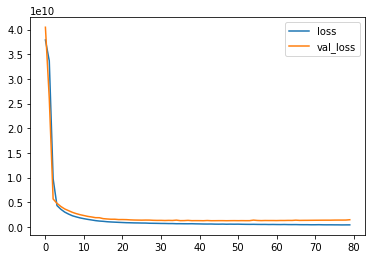

In [365]:
losses =pd.DataFrame(model.history.history)
losses.plot()

##### Realizamos la predicción

In [366]:
predictions = model.predict(X_test)

15/15 [==============================] - 0s 2ms/step


In [367]:
predictions

array([[237899.6  ],
       [195036.61 ],
       [133762.72 ],
       [116344.54 ],
       [155985.83 ],
       [113934.   ],
       [194341.7  ],
       [188705.33 ],
       [221978.92 ],
       [104218.305],
       [ 63394.395],
       [150010.67 ],
       [143502.83 ],
       [180256.9  ],
       [182724.19 ],
       [141807.5  ],
       [308016.47 ],
       [195879.05 ],
       [349503.06 ],
       [178334.73 ],
       [ 92781.5  ],
       [252336.42 ],
       [319348.7  ],
       [144387.78 ],
       [401666.1  ],
       [128027.1  ],
       [214486.2  ],
       [179341.45 ],
       [168211.77 ],
       [ 70949.97 ],
       [211091.52 ],
       [143593.27 ],
       [203123.9  ],
       [147397.58 ],
       [171348.89 ],
       [160281.8  ],
       [368215.2  ],
       [202590.67 ],
       [122757.5  ],
       [136466.73 ],
       [115709.22 ],
       [268591.25 ],
       [389603.75 ],
       [126237.11 ],
       [157686.22 ],
       [172594.16 ],
       [150721.97 ],
       [ 8932

##### Calculamos los erros más comunes

In [368]:
mean_squared_error(y_test, predictions)

1466642792.9883459

In [369]:
mean_squared_error(y_test, predictions)**0.5

38296.772618438044

In [370]:
mean_absolute_error(y_test, predictions)

18690.56416362213

In [371]:
df['SalePrice'].describe()

count      1451.000000
mean     180624.101999
std       79312.128273
min       34900.000000
25%      129900.000000
50%      162500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

##### Comprobación del modelo

Haremos un plot en el que se muestre el valor real de la venta con el valor de la predicción de nuestro modelo. En un caso perfecto, por ejemplo valor real de la venta con valor real de la venta, el plot sería una linea y=x, por lo tanto cuanto mas acerque nuesto plot a eso, mejor será nuestro modelo

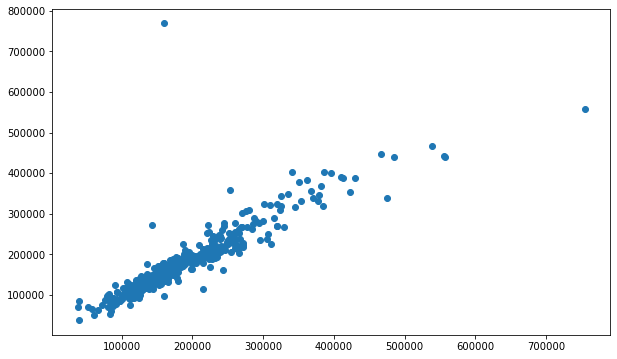

In [372]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, predictions)

### Aplicación de nuestro modelo a test.csv

Aquí nos encontramos con un problemay es que las columnas de test.csv y las de train.csv no coinciden, ya que al transformar los valores categóricos con get_dummies, en test_csv había unos valores distintos y por lo tanto, puede haber columnas que no se hayan generado.

Esto implica que nuestro modelo no va a funcionar bien. Es decir, nuestro modelo necesita leer las misma columnas con las que lo hemos ajustado.

Por lo tanto,crearemos una nueva base de datos (new) que contenga los valores de df_test, pero las columnas de df

In [373]:
#df.columns==df_test.columns

In [374]:
df.shape

(1451, 233)

In [375]:
df_test.shape

(1459, 216)

In [376]:
list_of_labels = list(df.columns)

In [377]:
new = pd.DataFrame(data=df_test, columns=list_of_labels)

In [378]:
#df.columns==new.columns

Comprobamos que los valores son de una escala similar a df

In [379]:

pd.set_option('display.max_columns', None)
new.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,882.0,896,0,0,896,0.0,0.0,1,0,

In [380]:
pd.set_option('display.max_columns', None)
df.head(2)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.

Observamos que varias columnas de new son ahora NaN, y esto es porque cuando hicimos el get dummies, no habia dtos realitvos a esas categorias entonces no creo la columna, lo que implicó que hubiese menos columnas en df_test que en df. 
Por ejemplo SalePrice, lo cual es lógico. Y todas las demás categorías que son NaN es por que en df_test no tenían columna, por lo que crea la columna pero la rellena con NaN. La solución es muy sencilla ya que solo tenemos que cambiar NaN por 0

In [381]:
new = new.drop('SalePrice', axis=1)

In [382]:
new = new.fillna(value=0)

In [383]:
new.shape

(1459, 232)

##### Escalamos los datos de nuestra nueva base de datos

In [384]:
new_scaled = scaler.transform(new)

/home/hector/.local/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


##### Hacemos la predicción

In [385]:
predcitions_test = model.predict(new_scaled)

46/46 [==============================] - 0s 1ms/step


In [386]:
predcitions_test

array([[119435.16],
       [142980.23],
       [177125.14],
       ...,
       [165636.08],
       [ 98765.9 ],
       [202459.17]], dtype=float32)

In [387]:
new.insert(0, 'SalePrice', predcitions_test )

In [388]:
new =new.reset_index()

/home/hector/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensi

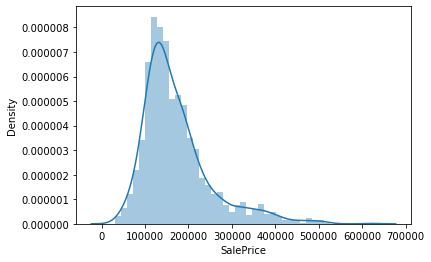

In [389]:
sns.distplot(new['SalePrice'])

# Entregar tarea

In [390]:
new.columns

Index(['Id', 'SalePrice', 'MSSubClass', 'LotFrontage', 'LotArea',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=234)

In [391]:
SalePrice =new[['Id','SalePrice']]

In [392]:
SalePrice.head()

,Id,SalePrice
0,1461,119435.156250
1,1462,142980.234375
2,1463,177125.140625
3,1464,185277.390625
4,1465,178091.203125


In [393]:
SalePrice.to_csv('SalePrice.csv', index=False)

In [394]:
SalePrice.shape

(1459, 2)